### 1-1. url에서 뉴스 기사의 링크와 제목을 출력하기

In [2]:
import requests
import bs4
from bs4 import BeautifulSoup

url = 'https://news.daum.net/economy'
print(url)

req_header = {
    'user-agent' : 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/135.0.0.0 Safari/537.36'
}

res = requests.get(url, headers=req_header)
res.encoding = 'utf-8'
print(type(res))
print(res.status_code)

if res.ok:
    html = res.text
    soup = BeautifulSoup(html, 'html.parser')
    li_tag_list = soup.select("ul.list_newsheadline2 li")
    print(type(li_tag_list))
    for li_tag in li_tag_list:
        a_tag = li_tag.find('a')
        link = a_tag['href']
        print(link)
        
        # select() => ResultSet, select_one() => Tag
        strong_tag = li_tag.select_one('div.cont_thumb strong.tit_txt')
        # 위의 방법이 안된다면 밑의 방법도 가능능
        # strong_tags = li_tag.select('div.cont_thumb strong.tit_txt')
        # if strong_tags:
        #     strong_tag = strong_tags[0]
            
        title = strong_tag.text.strip()
        print(title)
    
else:
    print(f'Error code = {res.status_code}')

https://news.daum.net/economy
<class 'requests.models.Response'>
200
<class 'bs4.element.ResultSet'>
https://v.daum.net/v/20250409220327565
[D리포트] "이런 게 논란이 된다는 게 놀랍다" 무안공항 제주항공 참사 처리 왜 신뢰 얻지 못하나
https://v.daum.net/v/20250409210315562
‘탈한국’ 열차에 왜 올라탔을까 [텅 비어가는 K제조업]
https://v.daum.net/v/20250409210301549
‘스마트팩토리’·리쇼어링…K제조업 재도약의 조건
https://v.daum.net/v/20250409195246181
수요 침체서 겨우 살아나나 싶었는데…IT도 미국발 침체 우려(종합)
https://v.daum.net/v/20250409191619350
혈세 1390억원 쓰는 대통령경호처는 누구를 경호했나 [視리즈]
https://v.daum.net/v/20250409190509044
트럼프의 책사 “관세, 미국이 제공하는 안보·무역체제의 대가”
https://v.daum.net/v/20250409185802873
12조 빚 몰린 스트래티지…결국 비트코인 매도 카드 꺼내나
https://v.daum.net/v/20250409182340171
아워홈 용인공장 근로자 사망…M&A 갈등 사이 안전책임자는 '공석' [한양경제]
https://v.daum.net/v/20250409182115106
트럼프 보란듯 뭉친 한중일… 경제블록화로 위기 넘을까 [통상 컨트롤타워가 없다 (3)]


### 1-2. 여러 개의 section 중 하나를 선택해서 url에서 뉴스 기사의 링크와 제목을 출력하는 코드를 함수로 작성하기

In [1]:
import requests
import bs4
from bs4 import BeautifulSoup

section_dict = {
    '기후/환경': 'climate',
    '사회': 'society',
    '경제': 'economy',
    '정치': 'politics',
    '국제': 'world',
    '문화': 'culture',
    '생활': 'life',
    'IT/과학':'tech',
    '인물':'people'
}

def print_news(name):
    #section = section_dict[name]
    section = section_dict.get(name)
    if section is None:
        print('요청하신 Key가 없습니다.')
    else:
        
        url = f"https://news.daum.net/{section}"
        print(f'=====> {url} {name} 뉴스 <=====')
        
        req_header = {
            'user-agent' : 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/135.0.0.0 Safari/537.36'
        }

        res = requests.get(url, headers=req_header)
        res.encoding = 'utf-8'
        
        if res.ok:
            html = res.text
            soup = BeautifulSoup(html, 'html.parser')
            li_tag_list = soup.select("ul.list_newsheadline2 li")
            for li_tag in li_tag_list:
                a_tag = li_tag.find('a')
                link = a_tag['href']
                print(link)
                
                # select() => ResultSet, select_one() => Tag
                strong_tag = li_tag.select_one('div.cont_thumb strong.tit_txt')
                # 위의 방법이 안된다면 밑의 방법도 가능
                # strong_tags = li_tag.select('div.cont_thumb strong.tit_txt')
                # if strong_tags:
                #     strong_tag = strong_tags[0]
                
                title = strong_tag.text.strip()
                print(title)
            
        else:
            print(f'Error code = {res.status_code}')
        
print_news('경제2')
print_news('경제')
print_news('사회')

요청하신 Key가 없습니다.
=====> https://news.daum.net/economy 경제 뉴스 <=====
https://v.daum.net/v/20250409220327565
[D리포트] "이런 게 논란이 된다는 게 놀랍다" 무안공항 제주항공 참사 처리 왜 신뢰 얻지 못하나
https://v.daum.net/v/20250409210315562
‘탈한국’ 열차에 왜 올라탔을까 [텅 비어가는 K제조업]
https://v.daum.net/v/20250409210301549
‘스마트팩토리’·리쇼어링…K제조업 재도약의 조건
https://v.daum.net/v/20250409195246181
수요 침체서 겨우 살아나나 싶었는데…IT도 미국발 침체 우려(종합)
https://v.daum.net/v/20250409191619350
혈세 1390억원 쓰는 대통령경호처는 누구를 경호했나 [視리즈]
https://v.daum.net/v/20250409190509044
트럼프의 책사 “관세, 미국이 제공하는 안보·무역체제의 대가”
https://v.daum.net/v/20250409185802873
12조 빚 몰린 스트래티지…결국 비트코인 매도 카드 꺼내나
https://v.daum.net/v/20250409182340171
아워홈 용인공장 근로자 사망…M&A 갈등 사이 안전책임자는 '공석' [한양경제]
https://v.daum.net/v/20250409182115106
트럼프 보란듯 뭉친 한중일… 경제블록화로 위기 넘을까 [통상 컨트롤타워가 없다 (3)]
=====> https://news.daum.net/society 사회 뉴스 <=====
https://v.daum.net/v/20250409220004507
AI교과서 도입 한달…‘회원 가입’조차 못한 학생 10명 중 4명
https://v.daum.net/v/20250409215219358
[뉴스인] 기회발전특구 추진…김덕현 연천군수 대담
https://v.daum.net/v/20250409205802436


### 2-1 NATE 뉴스 기사 제목 스크래핑 하기

=====> https://news.nate.com/section?mid=n0300 경제 뉴스 <=====


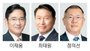

기사 제목: 억만장자 비밀모임에 韓 3대그룹 총수 초청
기사 링크:https://news.nate.com/view/20250409n34756?mid=n0300


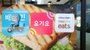

기사 제목: "지난달에도 네번 시켰네"…한국인들, 매달 10만원 '여기'에 쓴다
기사 링크:https://news.nate.com/view/20250409n28495?mid=n0300


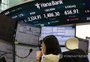

기사 제목: 1,500원대 환율 '뉴노멀' 되나…관세전쟁 충격에 "천장 열렸다"(종합)
기사 링크:https://news.nate.com/view/20250409n28823?mid=n0300


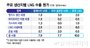

기사 제목: 알래스카 가스개발, 경제성 있다?…LNG·조선 협상 카드 구체화하나
기사 링크:https://news.nate.com/view/20250409n28527?mid=n0300


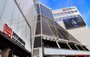

기사 제목: "7년째 적자" 현대免, 근속 만 3년 이상 직원 희망퇴직 단행
기사 링크:https://news.nate.com/view/20250409n27696?mid=n0300


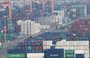

기사 제목: 미 상호관세 발효되자 코스피 2300선 붕괴…환율 1500원 '초읽기'
기사 링크:https://news.nate.com/view/20250409n22190?mid=n0300


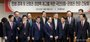

기사 제목: 주요 은행장 "기업 대출 위험 낮추고, 가상자산 거래 협업 확대 필요"
기사 링크:https://news.nate.com/view/20250409n22812?mid=n0300


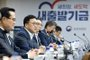

기사 제목: '자영업자 폐업 속출'에 새출발기금 신청자 12만명 육박
기사 링크:https://news.nate.com/view/20250409n22258?mid=n0300


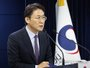

기사 제목: 금융당국 "이달 가계대출 분수령…토허제 풍선효과 면밀 점검"
기사 링크:https://news.nate.com/view/20250409n18135?mid=n0300


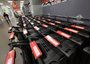

기사 제목: "입금 먼저"vs"못 믿겠다"…홈플러스, 이번엔 입점업체와 기싸움
기사 링크:https://news.nate.com/view/20250409n12981?mid=n0300


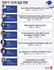

기사 제목: "서울 집값, 당분간 관망세…대선 이후 강남·용산 등 오른다"
기사 링크:https://news.nate.com/view/20250409n01699?mid=n0300


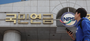

기사 제목: "우리는 못 받는거 아냐?" 시한부 국민연금…이것 도입땐 16년 수명연장
기사 링크:https://news.nate.com/view/20250409n02718?mid=n0300


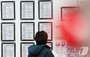

기사 제목: 3월 취업자 19.3만명↑…청년 고용률 4년만에 최저, '쉬었음' 역대 최대(종합)
기사 링크:https://news.nate.com/view/20250409n07454?mid=n0300


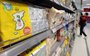

기사 제목: [단독] 도리토스보다 4배 비싼 '김 과자'…"다 망할 판" 탄식
기사 링크:https://news.nate.com/view/20250409n03870?mid=n0300


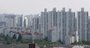

기사 제목: '부산 최대어' 분담금만 9억?…"거의 집 한채 값" 전국이 비명
기사 링크:https://news.nate.com/view/20250409n01232?mid=n0300


In [ ]:
import requests
from bs4 import BeautifulSoup
from urllib.parse import urljoin
from IPython.display import Image, display

section_dict = {
    '최신뉴스': 'recent?mid=n0100',
    '정치': 'section?mid=n0200',
    '경제': 'section?mid=n0300',
    '사회': 'section?mid=n0400',
    '세계': 'section?mid=n0500',
    'IT/과학': 'section?mid=n0600',
}

def display_image_from_url(img_url):
    try:
        response = requests.get(img_url, stream=True)
        if response.ok:
            image = Image(response.content)
            display(image)
        else:
            print("이미지를 가져오는 데 실패했습니다:", img_url)
    except Exception as e:
        print("이미지를 로드하는 도중 오류가 발생했습니다:", e)



def print_news(name):
    section = section_dict.get(name)
    if section is None:
        print('요청하신 Key가 없습니다.')
    else:
        url = f"https://news.nate.com/{section}"
        print(f'=====> {url} {name} 뉴스 <=====')
        
        req_header = {
            'user-agent' : 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/135.0.0.0 Safari/537.36'
        }

        res = requests.get(url, headers=req_header)
        
        if res.ok:
            html = res.text
            soup = BeautifulSoup(html, 'html.parser')
            div_tag_list = soup.select("div.mlt01")
            #print(len(div_tag_list))
            for div_tag in div_tag_list:
                base_url = "https:"
                
                img_tag = div_tag.find('img')
                if img_tag and 'src' in img_tag.attrs:
                    img_relative_link = img_tag['src']
                    img_link = urljoin(base_url, img_relative_link)
                    display_image_from_url(img_link)
                else:
                    print("이미지 url 없음")
                
                
                h2_tag = div_tag.select_one('div.mlt01 h2.tit')
                if h2_tag:
                    title = h2_tag.text.strip()
                    print(f"기사 제목: {title}")
                else:
                    print("기사 제목: 없음")
                
                a_tag = div_tag.find('a')
                if a_tag and 'href' in a_tag.attrs:
                    a_relative_link = a_tag['href']
                    a_link = urljoin(base_url, a_relative_link)
                    print(f"기사 링크:{a_link}")
                else:
                    print("기사 링크: 없음")
                
        else:
            print(f'Error code = {res.status_code}')
            
print_news('경제')

### 2-2 하나의 네이버 웹툰과 1개의 회차에 대한 Image 다운로드 하기

In [ ]:
import requests
from bs4 import BeautifulSoup
import os

def download_one_episode(title,no,url):
    if url is None:
        print('요청하신 이미지가 없습니다.')
    else:
        req_header = {
            'referer': url
        }
        res = requests.get(url)
        
        if res.ok:
            soup = BeautifulSoup(res.text, 'html.parser')
            
            img_tags = soup.select("img[src*='IMAG01']")
            
            img_url_list = list()
            for img_tag in img_tags:
                img_src = img_tag['src']
                img_url_list.append(img_src)
            
            imgdir_name = os.path.join('img',title,no)
            if not os.path.exists(imgdir_name):
                os.makedirs(imgdir_name)
            
            for img_url in img_url_list:
                res = requests.get(img_url, headers=req_header)
                if res.ok:
                    img_data = res.content
                    dir_name = os.path.join(imgdir_name, os.path.basename(img_url))
                    with open(dir_name, '+wb') as file:
                        file.write(img_data)
                else:
                    print(f'Error Code = {res.status_code}')
        else:
            print(f'Error Code = {res.status_code}')

download_one_episode('낣이사는이야기','48','https://comic.naver.com/webtoon/detail?titleId=833255&no=48&week=tue')
download_one_episode('낣이사는이야기','47','https://comic.naver.com/webtoon/detail?titleId=833255&no=47&week=tue')